In [1]:
!pip install pandas
!pip install seaborn
!pip install sklearn
!pip install xgboost

In [2]:
import gexp

In [3]:
Double_df = gexp.load_labeled_data(data_dir = './Data', label_list=['LUAD', 'LUSC'], patient_type = './BRCApatient_type.csv')
Double_df

load file : LUAD.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt
load file : LUSC.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt


Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,Target
TCGA-05-4244-01A-01R-1107-07,0.0,10.0113,11.2820,49.5994,848.9397,0.0,345.2308,1.0472,0.0000,0.0,...,292.5212,959.2460,0.6981,1088.0531,2837.9440,871.2802,575.2683,6.6323,0.0000,LUAD
TCGA-05-4249-01A-01R-1107-07,0.0,7.1957,12.4436,90.5117,924.0158,0.0,145.2025,1.6098,0.0000,0.0,...,493.5597,1179.3275,20.2833,787.5061,2351.2500,1138.1170,690.2752,179.9738,0.0000,LUAD
TCGA-05-4250-01A-01R-1107-07,0.0,7.2453,6.0184,49.5366,1140.6781,0.0,51.7284,0.0000,0.0000,0.0,...,365.4149,843.9028,26.5274,475.1720,5437.4534,1170.5214,532.8691,6.3003,0.0000,LUAD
TCGA-05-4382-01A-01R-1206-07,0.0,11.3311,7.5740,82.8303,807.1729,0.0,240.0221,0.4786,0.2393,0.0,...,346.7517,946.6872,64.8514,908.1593,6770.1537,1169.2401,663.8297,35.1777,0.0000,LUAD
TCGA-05-4384-01A-01R-1755-07,0.0,3.2254,3.4942,72.5351,562.0037,0.0,274.2822,0.6109,0.0000,0.0,...,563.2254,1320.7086,7.9414,778.8638,3341.4783,1737.3244,723.2743,378.1307,0.0000,LUAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-O2-A52S-01A-11R-A262-07,0.0,19.9503,47.1026,176.7177,1188.3278,0.0,226.8212,1.6556,0.0000,0.0,...,507.4503,1392.7980,126.2417,580.2980,2681.7053,1069.5364,783.1126,5.3808,1.2417,LUSC
TCGA-O2-A52V-01A-31R-A262-07,0.0,30.0872,15.2957,188.7215,1248.0303,0.0,147.4945,0.4202,0.0000,0.0,...,366.8453,1326.6099,6.3032,845.8872,6094.3376,663.9353,778.6532,2.1011,0.0000,LUSC
TCGA-O2-A52W-01A-11R-A26W-07,0.0,53.6593,33.3907,260.3332,789.3606,0.0,854.3794,0.0000,0.0000,0.0,...,336.9156,2002.6867,101.5583,613.6486,2560.9887,730.2526,761.9559,12.3589,0.0000,LUSC
TCGA-O2-A5IB-01A-11R-A27Q-07,0.0,72.5666,42.1832,160.1624,460.8626,0.0,569.2226,1.3312,0.0000,0.0,...,584.1321,2074.5474,150.4260,1155.2183,1185.0373,833.3333,1383.1203,1.0650,0.0000,LUSC


In [4]:
# 유방암 옵션은 ['LumA, 'Her2', 'LumB', 'Basal'] 
Multi_df = gexp.load_labeled_data(data_dir = './Data', label_list=['BRCA_LUMA','BRCA_LUMB','BRCA_HER2','BRCA_BASAL'], patient_type = './BRCApatient_type.csv')
Multi_df

load file : BRCA.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt
load file : BRCA.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt
load file : BRCA.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt
load file : BRCA.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt


,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,Target
TCGA-3C-AAAU-01A-11R-A41B-07,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,0.0,0.0,...,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0000,BRCA_LUMA
TCGA-3C-AALK-01A-11R-A41B-07,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,0.0,0.0,...,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0000,BRCA_LUMA
TCGA-4H-AAAK-01A-12R-A41B-07,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,0.0,0.0,...,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0000,BRCA_LUMA
TCGA-5L-AAT0-01A-12R-A41B-07,0.0000,3.9889,13.6090,114.2572,807.7431,0.0,276.2868,0.0000,0.0,0.0,...,643.4961,1115.7061,15.8381,626.4848,4131.9842,922.1293,1061.7393,85.0565,0.0000,BRCA_LUMA
TCGA-5L-AAT1-01A-12R-A41B-07,0.0000,0.0000,10.5949,115.9984,1108.3945,0.0,208.6390,0.0000,0.0,0.0,...,568.0522,988.5901,53.7897,513.4474,4418.0929,1411.5729,568.8672,57.8647,0.0000,BRCA_LUMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-PL-A8LV-01A-21R-A41B-07,0.4618,20.0732,33.8820,72.5789,964.3347,0.0,545.9534,0.0000,0.0,0.0,...,302.6978,1492.4554,220.8505,691.8153,4192.5011,941.9296,612.7115,372.6566,0.0000,BRCA_BASAL
TCGA-PL-A8LZ-01A-31R-A36F-07,0.0000,8.1947,9.7406,145.9720,968.0794,0.0,162.2718,0.0000,0.0,0.0,...,585.4596,1016.3339,126.8282,830.5754,4432.1554,1257.1795,873.2785,21.3516,0.0000,BRCA_BASAL
TCGA-S3-AA0Z-01A-11R-A41B-07,0.0000,21.1100,34.7311,140.1610,620.7605,0.0,216.8551,0.6852,0.0,0.0,...,290.5104,2294.2789,7.8794,846.5228,1948.2700,1525.1799,794.1076,13.0182,0.3426,BRCA_BASAL
TCGA-S3-AA10-01A-21R-A41B-07,0.4254,11.0634,10.6295,125.2999,1098.6814,0.0,177.3713,0.4254,0.0,0.0,...,394.7256,1129.3067,131.4334,377.2863,4073.1604,1697.5755,964.2705,35.3041,0.4254,BRCA_BASAL


In [5]:
# feature 노말라이즈
log1p_df = gexp.normalize(Multi_df, methods = ['log1p'], exclude = 'Target')
log1p_df

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,Target
TCGA-3C-AAAU-01A-11R-A41B-07,0.000000,2.854422,2.634160,3.973124,6.013901,0.0,7.080031,0.000000,0.0,0.0,...,6.916499,7.414271,5.558734,7.097858,8.162872,7.547467,7.074503,1.001844,0.000000,BRCA_LUMA
TCGA-3C-AALK-01A-11R-A41B-07,0.000000,2.571803,2.491543,4.975797,6.764503,0.0,6.316716,0.346210,0.0,0.0,...,6.083890,6.762592,5.172891,6.410774,8.646879,6.662026,6.553746,4.213778,0.000000,BRCA_LUMA
TCGA-4H-AAAK-01A-12R-A41B-07,0.000000,2.060106,2.736301,4.445152,6.642986,0.0,5.567776,0.354523,0.0,0.0,...,6.052690,6.957295,2.710886,6.655112,8.304669,6.724931,6.782988,5.237686,0.000000,BRCA_LUMA
TCGA-5L-AAT0-01A-12R-A41B-07,0.000000,1.607215,2.681638,4.747166,6.695481,0.0,5.625052,0.000000,0.0,0.0,...,6.468469,7.018139,2.823644,6.441719,8.326755,6.827769,6.968605,4.455004,0.000000,BRCA_LUMA
TCGA-5L-AAT1-01A-12R-A41B-07,0.000000,0.000000,2.450565,4.762160,7.011570,0.0,5.345387,0.000000,0.0,0.0,...,6.343972,6.897291,4.003502,6.243093,8.393690,7.253168,6.345403,4.075242,0.000000,BRCA_LUMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-PL-A8LV-01A-21R-A41B-07,0.379669,3.048002,3.551971,4.298358,6.872475,0.0,6.304364,0.000000,0.0,0.0,...,5.716033,7.308848,5.402004,6.540763,8.341291,6.848992,6.419525,5.923337,0.000000,BRCA_BASAL
TCGA-PL-A8LZ-01A-31R-A36F-07,0.000000,2.218627,2.374031,4.990242,6.876347,0.0,5.095416,0.000000,0.0,0.0,...,6.374104,6.924941,4.850687,6.723322,8.396867,7.137421,6.773399,3.106898,0.000000,BRCA_BASAL
TCGA-S3-AA0Z-01A-11R-A41B-07,0.000000,3.096030,3.576021,4.949901,6.432555,0.0,5.383830,0.521884,0.0,0.0,...,5.675076,7.738610,2.183734,6.742318,7.575210,7.330523,6.678477,2.640356,0.294608,BRCA_BASAL
TCGA-S3-AA10-01A-21R-A41B-07,0.354452,2.490176,2.453545,4.838659,7.002776,0.0,5.183867,0.354452,0.0,0.0,...,5.980721,7.030244,4.886080,5.935651,8.312420,7.437545,6.872408,3.591931,0.354452,BRCA_BASAL


In [6]:
# feature 노말라이즈
z_score_df = gexp.normalize(Multi_df, methods = ['z_score'], exclude = 'Target')
z_score_df

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,Target
TCGA-3C-AAAU-01A-11R-A41B-07,-0.118922,0.974366,0.846390,-1.036064,-1.476777,0.0,4.908947,-0.845901,-0.065517,-0.046759,...,1.214815,2.013330,1.353215,0.995770,-0.164176,1.300345,0.403213,-0.596740,-0.091326,BRCA_LUMA
TCGA-3C-AALK-01A-11R-A41B-07,-0.118922,0.427750,0.538149,0.441303,-0.497540,0.0,1.644596,-0.168433,-0.065517,-0.046759,...,-0.446771,-0.921194,0.575229,-0.889294,0.960012,-0.877951,-0.495102,-0.391870,-0.091326,BRCA_LUMA
TCGA-4H-AAAK-01A-12R-A41B-07,-0.118922,-0.242585,1.095787,-0.519588,-0.709786,0.0,0.142255,-0.149109,-0.065517,-0.046759,...,-0.486056,-0.234641,-0.936177,-0.361170,0.110915,-0.778636,-0.156383,-0.011030,-0.091326,BRCA_LUMA
TCGA-5L-AAT0-01A-12R-A41B-07,-0.118922,-0.608005,0.959153,-0.035621,-0.621251,0.0,0.221699,-0.845901,-0.065517,-0.046759,...,0.152990,0.008797,-0.919362,-0.829323,0.157384,-0.602201,0.180844,-0.333634,-0.091326,BRCA_LUMA
TCGA-5L-AAT1-01A-12R-A41B-07,-0.118922,-1.118039,0.457414,-0.007573,0.022323,0.0,-0.126468,-0.845901,-0.065517,-0.046759,...,-0.066915,-0.460642,-0.563929,-1.183865,0.304648,0.355019,-0.742353,-0.419486,-0.091326,BRCA_LUMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-PL-A8LV-01A-21R-A41B-07,4.294452,1.448584,4.333876,-0.706992,-0.286051,0.0,1.609608,-0.845901,-0.065517,-0.046759,...,-0.840372,1.400133,1.000667,-0.624415,0.188533,-0.563477,-0.660229,0.574402,-0.091326,BRCA_BASAL
TCGA-PL-A8LZ-01A-31R-A36F-07,-0.118922,-0.070238,0.315204,0.475254,-0.278035,0.0,-0.365109,-0.845901,-0.065517,-0.046759,...,-0.016176,-0.358184,0.120108,-0.189194,0.311886,0.053067,-0.172162,-0.534768,-0.091326,BRCA_BASAL
TCGA-S3-AA0Z-01A-11R-A41B-07,-0.118922,1.581153,4.475220,0.381649,-1.021505,0.0,-0.084182,0.276171,-0.065517,-0.046759,...,-0.875896,4.361269,-0.993898,-0.139175,-0.966603,0.577204,-0.320456,-0.561079,0.154732,BRCA_BASAL
TCGA-S3-AA10-01A-21R-A41B-07,3.946581,0.296563,0.463174,0.142260,0.001531,0.0,-0.287395,-0.149273,-0.065517,-0.046759,...,-0.572129,0.059024,0.163237,-1.610934,0.127107,0.914364,-0.001725,-0.490716,0.214200,BRCA_BASAL


In [7]:
# feature 노말라이즈
log1p_z_score_df = gexp.normalize(Multi_df, methods = ['log1p', 'z_score'], exclude = 'Target')
log1p_z_score_df

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,Target
TCGA-3C-AAAU-01A-11R-A41B-07,-0.134749,1.056172,1.002812,-1.692139,-2.548520,0.0,2.666244,-1.018889,-0.127609,-0.05156,...,1.339522,1.726547,1.158181,1.011694,0.053996,1.256648,0.698344,-2.250114,-0.230360,BRCA_LUMA
TCGA-3C-AALK-01A-11R-A41B-07,-0.134749,0.715084,0.785385,0.730577,-0.466321,0.0,1.583204,-0.015515,-0.127609,-0.05156,...,-0.354899,-0.901187,0.809445,-0.876094,1.066595,-0.911735,-0.527267,-0.041336,-0.230360,BRCA_LUMA
TCGA-4H-AAAK-01A-12R-A41B-07,-0.134749,0.097528,1.158533,-0.551599,-0.803414,0.0,0.520562,0.008575,-0.127609,-0.05156,...,-0.418395,-0.116094,-1.415783,-0.204768,0.350651,-0.757683,0.012257,0.662783,-0.230360,BRCA_LUMA
TCGA-5L-AAT0-01A-12R-A41B-07,-0.134749,-0.449056,1.075196,0.178145,-0.657790,0.0,0.601829,-1.018889,-0.127609,-0.05156,...,0.427746,0.129243,-1.313869,-0.791071,0.396858,-0.505841,0.449111,0.124550,-0.230360,BRCA_LUMA
TCGA-5L-AAT1-01A-12R-A41B-07,-0.134749,-2.388771,0.722912,0.214375,0.219050,0.0,0.205022,-1.018889,-0.127609,-0.05156,...,0.174386,-0.358046,-0.247481,-1.336803,0.536894,0.535931,-1.017607,-0.136605,-0.230360,BRCA_LUMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-PL-A8LV-01A-21R-A41B-07,5.367157,1.289799,2.402071,-0.906289,-0.166804,0.0,1.565679,-1.018889,-0.127609,-0.05156,...,-1.103516,1.301456,1.016524,-0.518944,0.427270,-0.453869,-0.843160,1.134291,-0.230360,BRCA_BASAL
TCGA-PL-A8LZ-01A-31R-A36F-07,-0.134749,0.288844,0.606231,0.765479,-0.156064,0.0,-0.149652,-1.018889,-0.127609,-0.05156,...,0.235706,-0.246555,0.518229,-0.017358,0.543541,0.252475,-0.010311,-0.802514,-0.230360,BRCA_BASAL
TCGA-S3-AA0Z-01A-11R-A41B-07,-0.134749,1.347763,2.438737,0.668005,-1.387158,0.0,0.259567,0.493617,-0.127609,-0.05156,...,-1.186867,3.034364,-1.892238,0.034834,-1.175461,0.725368,-0.233711,-1.123344,1.058865,BRCA_BASAL
TCGA-S3-AA10-01A-21R-A41B-07,5.001742,0.616571,0.727455,0.399216,0.194656,0.0,-0.024152,0.008372,-0.127609,-0.05156,...,-0.564857,0.178056,0.550218,-2.181511,0.366868,0.987457,0.222710,-0.468967,1.320749,BRCA_BASAL


In [8]:
# 타겟 문자->숫자 인코딩
from sklearn.preprocessing import LabelEncoder
df = log1p_df.copy()
df['Target'] = LabelEncoder().fit_transform(df['Target'])
df

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,Target
TCGA-3C-AAAU-01A-11R-A41B-07,0.000000,2.854422,2.634160,3.973124,6.013901,0.0,7.080031,0.000000,0.0,0.0,...,6.916499,7.414271,5.558734,7.097858,8.162872,7.547467,7.074503,1.001844,0.000000,2
TCGA-3C-AALK-01A-11R-A41B-07,0.000000,2.571803,2.491543,4.975797,6.764503,0.0,6.316716,0.346210,0.0,0.0,...,6.083890,6.762592,5.172891,6.410774,8.646879,6.662026,6.553746,4.213778,0.000000,2
TCGA-4H-AAAK-01A-12R-A41B-07,0.000000,2.060106,2.736301,4.445152,6.642986,0.0,5.567776,0.354523,0.0,0.0,...,6.052690,6.957295,2.710886,6.655112,8.304669,6.724931,6.782988,5.237686,0.000000,2
TCGA-5L-AAT0-01A-12R-A41B-07,0.000000,1.607215,2.681638,4.747166,6.695481,0.0,5.625052,0.000000,0.0,0.0,...,6.468469,7.018139,2.823644,6.441719,8.326755,6.827769,6.968605,4.455004,0.000000,2
TCGA-5L-AAT1-01A-12R-A41B-07,0.000000,0.000000,2.450565,4.762160,7.011570,0.0,5.345387,0.000000,0.0,0.0,...,6.343972,6.897291,4.003502,6.243093,8.393690,7.253168,6.345403,4.075242,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-PL-A8LV-01A-21R-A41B-07,0.379669,3.048002,3.551971,4.298358,6.872475,0.0,6.304364,0.000000,0.0,0.0,...,5.716033,7.308848,5.402004,6.540763,8.341291,6.848992,6.419525,5.923337,0.000000,0
TCGA-PL-A8LZ-01A-31R-A36F-07,0.000000,2.218627,2.374031,4.990242,6.876347,0.0,5.095416,0.000000,0.0,0.0,...,6.374104,6.924941,4.850687,6.723322,8.396867,7.137421,6.773399,3.106898,0.000000,0
TCGA-S3-AA0Z-01A-11R-A41B-07,0.000000,3.096030,3.576021,4.949901,6.432555,0.0,5.383830,0.521884,0.0,0.0,...,5.675076,7.738610,2.183734,6.742318,7.575210,7.330523,6.678477,2.640356,0.294608,0
TCGA-S3-AA10-01A-21R-A41B-07,0.354452,2.490176,2.453545,4.838659,7.002776,0.0,5.183867,0.354452,0.0,0.0,...,5.980721,7.030244,4.886080,5.935651,8.312420,7.437545,6.872408,3.591931,0.354452,0


In [9]:
# 타겟 문자->숫자 인코딩
from sklearn.preprocessing import LabelEncoder
df = z_score_df.copy()
df['Target'] = LabelEncoder().fit_transform(df['Target'])
df

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,Target
TCGA-3C-AAAU-01A-11R-A41B-07,-0.118922,0.974366,0.846390,-1.036064,-1.476777,0.0,4.908947,-0.845901,-0.065517,-0.046759,...,1.214815,2.013330,1.353215,0.995770,-0.164176,1.300345,0.403213,-0.596740,-0.091326,2
TCGA-3C-AALK-01A-11R-A41B-07,-0.118922,0.427750,0.538149,0.441303,-0.497540,0.0,1.644596,-0.168433,-0.065517,-0.046759,...,-0.446771,-0.921194,0.575229,-0.889294,0.960012,-0.877951,-0.495102,-0.391870,-0.091326,2
TCGA-4H-AAAK-01A-12R-A41B-07,-0.118922,-0.242585,1.095787,-0.519588,-0.709786,0.0,0.142255,-0.149109,-0.065517,-0.046759,...,-0.486056,-0.234641,-0.936177,-0.361170,0.110915,-0.778636,-0.156383,-0.011030,-0.091326,2
TCGA-5L-AAT0-01A-12R-A41B-07,-0.118922,-0.608005,0.959153,-0.035621,-0.621251,0.0,0.221699,-0.845901,-0.065517,-0.046759,...,0.152990,0.008797,-0.919362,-0.829323,0.157384,-0.602201,0.180844,-0.333634,-0.091326,2
TCGA-5L-AAT1-01A-12R-A41B-07,-0.118922,-1.118039,0.457414,-0.007573,0.022323,0.0,-0.126468,-0.845901,-0.065517,-0.046759,...,-0.066915,-0.460642,-0.563929,-1.183865,0.304648,0.355019,-0.742353,-0.419486,-0.091326,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-PL-A8LV-01A-21R-A41B-07,4.294452,1.448584,4.333876,-0.706992,-0.286051,0.0,1.609608,-0.845901,-0.065517,-0.046759,...,-0.840372,1.400133,1.000667,-0.624415,0.188533,-0.563477,-0.660229,0.574402,-0.091326,0
TCGA-PL-A8LZ-01A-31R-A36F-07,-0.118922,-0.070238,0.315204,0.475254,-0.278035,0.0,-0.365109,-0.845901,-0.065517,-0.046759,...,-0.016176,-0.358184,0.120108,-0.189194,0.311886,0.053067,-0.172162,-0.534768,-0.091326,0
TCGA-S3-AA0Z-01A-11R-A41B-07,-0.118922,1.581153,4.475220,0.381649,-1.021505,0.0,-0.084182,0.276171,-0.065517,-0.046759,...,-0.875896,4.361269,-0.993898,-0.139175,-0.966603,0.577204,-0.320456,-0.561079,0.154732,0
TCGA-S3-AA10-01A-21R-A41B-07,3.946581,0.296563,0.463174,0.142260,0.001531,0.0,-0.287395,-0.149273,-0.065517,-0.046759,...,-0.572129,0.059024,0.163237,-1.610934,0.127107,0.914364,-0.001725,-0.490716,0.214200,0


In [10]:
# 타겟 문자->숫자 인코딩
from sklearn.preprocessing import LabelEncoder
df = log1p_z_score_df.copy()
df['Target'] = LabelEncoder().fit_transform(df['Target'])
df

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,Target
TCGA-3C-AAAU-01A-11R-A41B-07,-0.134749,1.056172,1.002812,-1.692139,-2.548520,0.0,2.666244,-1.018889,-0.127609,-0.05156,...,1.339522,1.726547,1.158181,1.011694,0.053996,1.256648,0.698344,-2.250114,-0.230360,2
TCGA-3C-AALK-01A-11R-A41B-07,-0.134749,0.715084,0.785385,0.730577,-0.466321,0.0,1.583204,-0.015515,-0.127609,-0.05156,...,-0.354899,-0.901187,0.809445,-0.876094,1.066595,-0.911735,-0.527267,-0.041336,-0.230360,2
TCGA-4H-AAAK-01A-12R-A41B-07,-0.134749,0.097528,1.158533,-0.551599,-0.803414,0.0,0.520562,0.008575,-0.127609,-0.05156,...,-0.418395,-0.116094,-1.415783,-0.204768,0.350651,-0.757683,0.012257,0.662783,-0.230360,2
TCGA-5L-AAT0-01A-12R-A41B-07,-0.134749,-0.449056,1.075196,0.178145,-0.657790,0.0,0.601829,-1.018889,-0.127609,-0.05156,...,0.427746,0.129243,-1.313869,-0.791071,0.396858,-0.505841,0.449111,0.124550,-0.230360,2
TCGA-5L-AAT1-01A-12R-A41B-07,-0.134749,-2.388771,0.722912,0.214375,0.219050,0.0,0.205022,-1.018889,-0.127609,-0.05156,...,0.174386,-0.358046,-0.247481,-1.336803,0.536894,0.535931,-1.017607,-0.136605,-0.230360,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-PL-A8LV-01A-21R-A41B-07,5.367157,1.289799,2.402071,-0.906289,-0.166804,0.0,1.565679,-1.018889,-0.127609,-0.05156,...,-1.103516,1.301456,1.016524,-0.518944,0.427270,-0.453869,-0.843160,1.134291,-0.230360,0
TCGA-PL-A8LZ-01A-31R-A36F-07,-0.134749,0.288844,0.606231,0.765479,-0.156064,0.0,-0.149652,-1.018889,-0.127609,-0.05156,...,0.235706,-0.246555,0.518229,-0.017358,0.543541,0.252475,-0.010311,-0.802514,-0.230360,0
TCGA-S3-AA0Z-01A-11R-A41B-07,-0.134749,1.347763,2.438737,0.668005,-1.387158,0.0,0.259567,0.493617,-0.127609,-0.05156,...,-1.186867,3.034364,-1.892238,0.034834,-1.175461,0.725368,-0.233711,-1.123344,1.058865,0
TCGA-S3-AA10-01A-21R-A41B-07,5.001742,0.616571,0.727455,0.399216,0.194656,0.0,-0.024152,0.008372,-0.127609,-0.05156,...,-0.564857,0.178056,0.550218,-2.181511,0.366868,0.987457,0.222710,-0.468967,1.320749,0


In [11]:
rank, importance = gexp.biomarker_rank(df, models = [['RF', 'default'],['XGB' , {'colsample_bytree': 0.5, 'n_estimators': 200, 'subsample': 0.75}]])

In [12]:
rank

,RF,XGB
?|100130426,4498,810
?|100133144,4498,282
?|100134869,4498,287
?|10357,4498,490
?|10431,4498,211
...,...,...
ZYX|7791,4498,810
ZZEF1|23140,4498,810
ZZZ3|26009,3270,810
psiTPTE22|387590,4498,810


In [13]:
importance

,RF,XGB
?|100130426,0.000000,0.000000
?|100133144,0.000000,0.000576
?|100134869,0.000000,0.000558
?|10357,0.000000,0.000140
?|10431,0.000000,0.000960
...,...,...
ZYX|7791,0.000000,0.000000
ZZEF1|23140,0.000000,0.000000
ZZZ3|26009,0.000037,0.000000
psiTPTE22|387590,0.000000,0.000000


/opt/conda/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


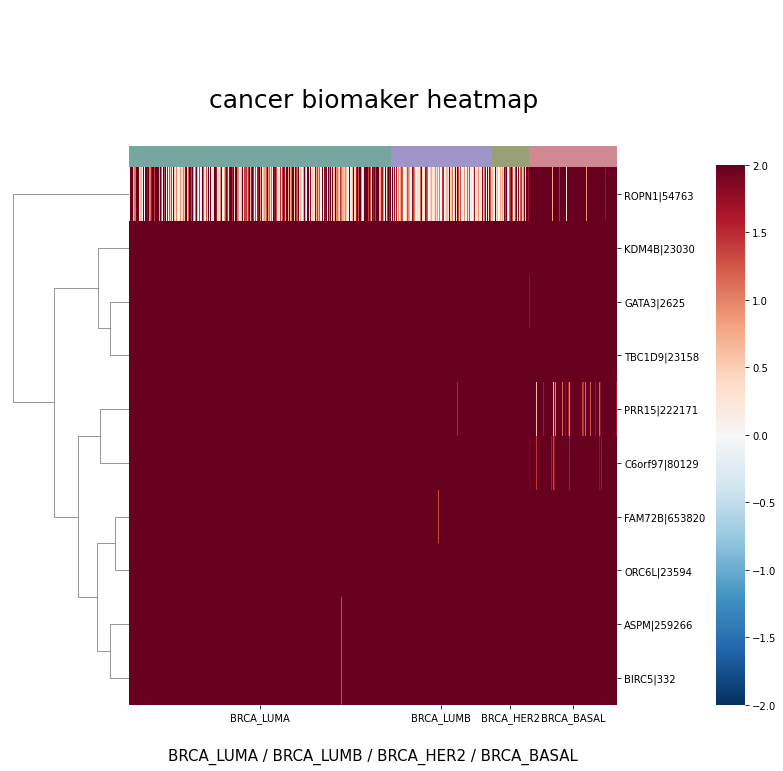

In [14]:
gene_list = rank.sort_values(by='RF').iloc[:10].index
gexp.plot_heatmap(log1p_df, gene_list)

/opt/conda/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


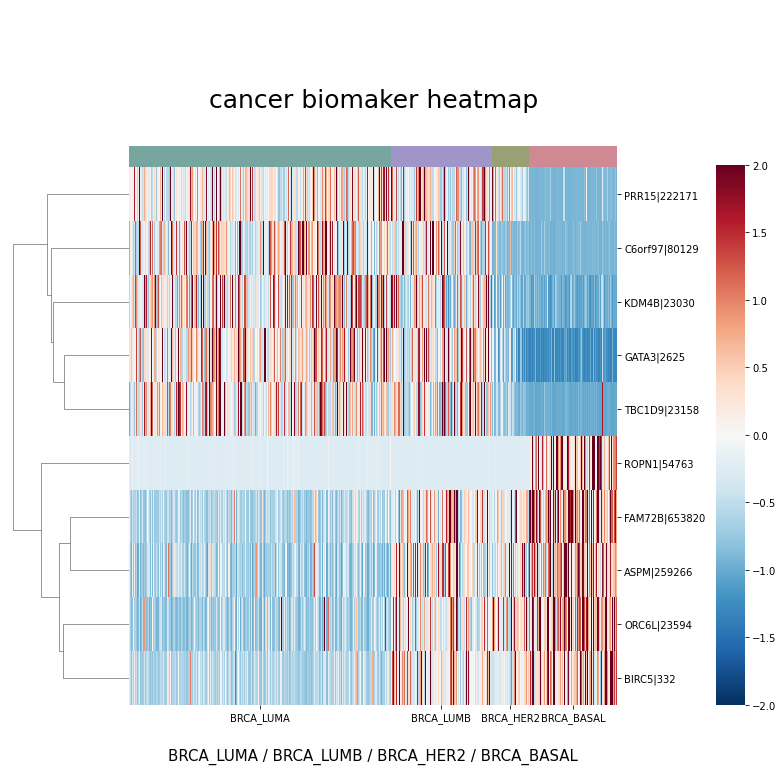

In [15]:
gene_list = rank.sort_values(by='RF').iloc[:10].index
gexp.plot_heatmap(z_score_df, gene_list)

/opt/conda/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


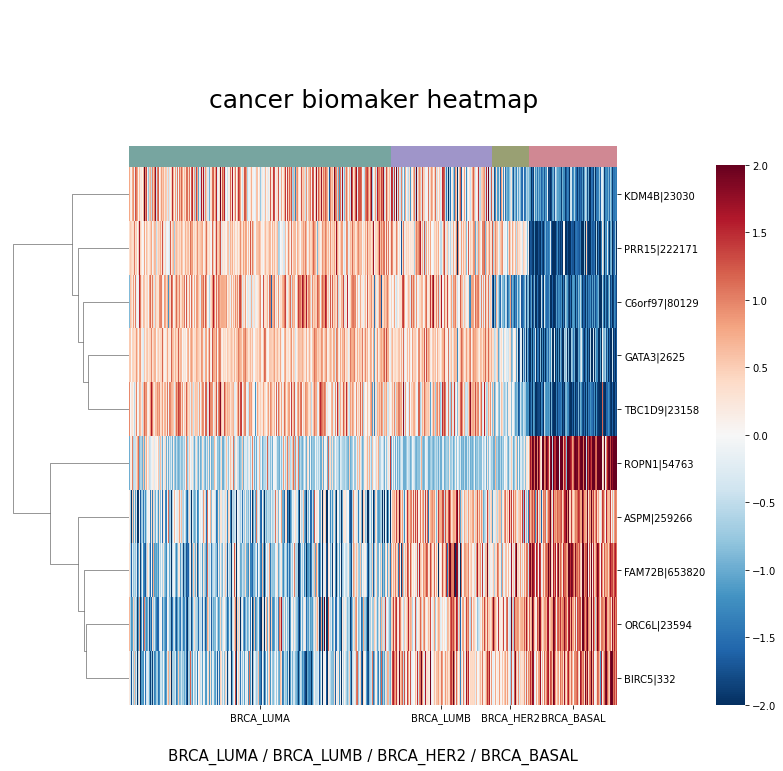

In [16]:
gene_list = rank.sort_values(by='RF').iloc[:10].index
gexp.plot_heatmap(log1p_z_score_df, gene_list)